In [3]:
# Sierra Leone Solar Data EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [4]:
# Load Sierra Leone data
df = pd.read_csv('../data/sierraleone-bumbuna.csv')
print("Sierra Leone dataset loaded successfully!")
print(f"Shape: {df.shape}")
df.head()

Sierra Leone dataset loaded successfully!
Shape: (525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [5]:
# Check basic info
print("=== BASIC INFO ===")
df.info()

=== BASIC INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB     

In [6]:
# Check missing values
print("=== MISSING VALUES ===")
missing_values = df.isna().sum()
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

=== MISSING VALUES ===
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Total missing values: 525600


In [7]:
# Summary statistics
print("=== SUMMARY STATISTICS ===")
df.describe()

=== SUMMARY STATISTICS ===


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [8]:
# Check for outliers using Z-scores
print("=== OUTLIER DETECTION ===")
outlier_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

z_scores = np.abs(stats.zscore(df[outlier_columns], nan_policy='omit'))
outlier_mask = (z_scores > 3).any(axis=1)

print(f"Outliers found: {outlier_mask.sum()}")
print(f"Percentage: {(outlier_mask.sum() / len(df)) * 100:.2f}%")

=== OUTLIER DETECTION ===
Outliers found: 16292
Percentage: 3.10%


In [9]:
# DATA CLEANING FOR SIERRA LEONE
print("=== DATA CLEANING ===")
df_clean = df.copy()

# Handle missing values
key_columns = ['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'ModA', 'ModB']
for col in key_columns:
    if df_clean[col].isna().sum() > 0:
        median_val = df_clean[col].median()
        df_clean[col].fillna(median_val, inplace=True)
        print(f"Imputed {col} with median: {median_val:.2f}")

# Remove outliers
df_clean = df_clean[~outlier_mask]
print(f"Original data: {len(df)} rows")
print(f"Clean data: {len(df_clean)} rows")
print(f"Data retention: {(len(df_clean)/len(df))*100:.2f}%")

=== DATA CLEANING ===
Original data: 525600 rows
Clean data: 509308 rows
Data retention: 96.90%


In [10]:
# Convert timestamp and create time features
print("=== TIME FEATURES ===")
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean['Hour'] = df_clean['Timestamp'].dt.hour
df_clean['Month'] = df_clean['Timestamp'].dt.month
df_clean['Day'] = df_clean['Timestamp'].dt.day

print("Time features created successfully!")
print(df_clean[['Timestamp', 'Hour', 'Month', 'Day']].head())

=== TIME FEATURES ===
Time features created successfully!
            Timestamp  Hour  Month  Day
0 2021-10-30 00:01:00     0     10   30
1 2021-10-30 00:02:00     0     10   30
2 2021-10-30 00:03:00     0     10   30
3 2021-10-30 00:04:00     0     10   30
4 2021-10-30 00:05:00     0     10   30


=== GHI OVER TIME ===


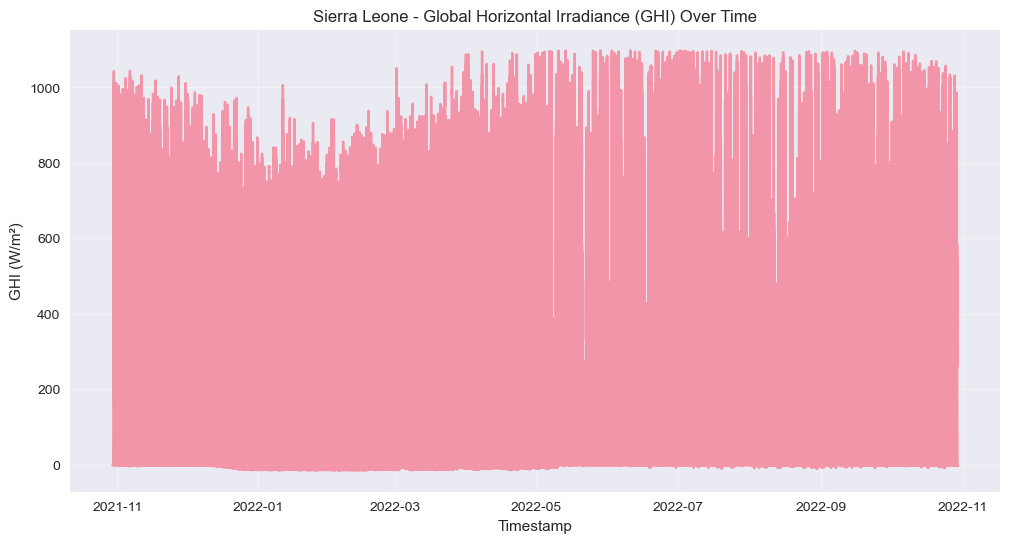

Max GHI: 1097.0 W/m²
Average GHI: 185.0 W/m²


In [11]:
# FIRST VISUALIZATION - GHI over time
print("=== GHI OVER TIME ===")
plt.figure(figsize=(12, 6))
plt.plot(df_clean['Timestamp'], df_clean['GHI'], alpha=0.7)
plt.title('Sierra Leone - Global Horizontal Irradiance (GHI) Over Time')
plt.ylabel('GHI (W/m²)')
plt.xlabel('Timestamp')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Max GHI: {df_clean['GHI'].max():.1f} W/m²")
print(f"Average GHI: {df_clean['GHI'].mean():.1f} W/m²")

=== HOURLY GHI PATTERNS ===


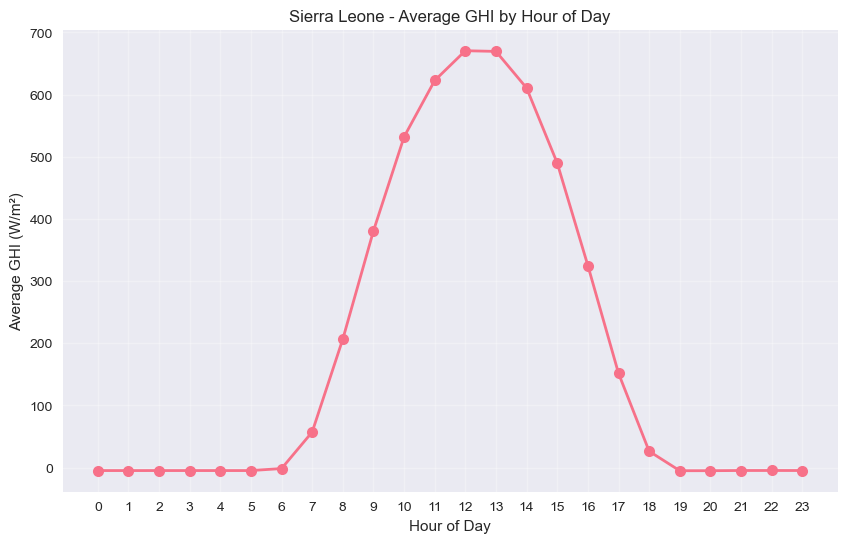

Peak solar hour: 12:00
Peak GHI: 670.5 W/m²


In [12]:
# DIURNAL PATTERNS - GHI by hour
print("=== HOURLY GHI PATTERNS ===")
hourly_ghi = df_clean.groupby('Hour')['GHI'].mean()

plt.figure(figsize=(10, 6))
plt.plot(hourly_ghi.index, hourly_ghi.values, marker='o', linewidth=2, markersize=8)
plt.title('Sierra Leone - Average GHI by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average GHI (W/m²)')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.show()

peak_hour = hourly_ghi.idxmax()
peak_ghi = hourly_ghi.max()
print(f"Peak solar hour: {peak_hour}:00")
print(f"Peak GHI: {peak_ghi:.1f} W/m²")

=== CORRELATION HEATMAP ===


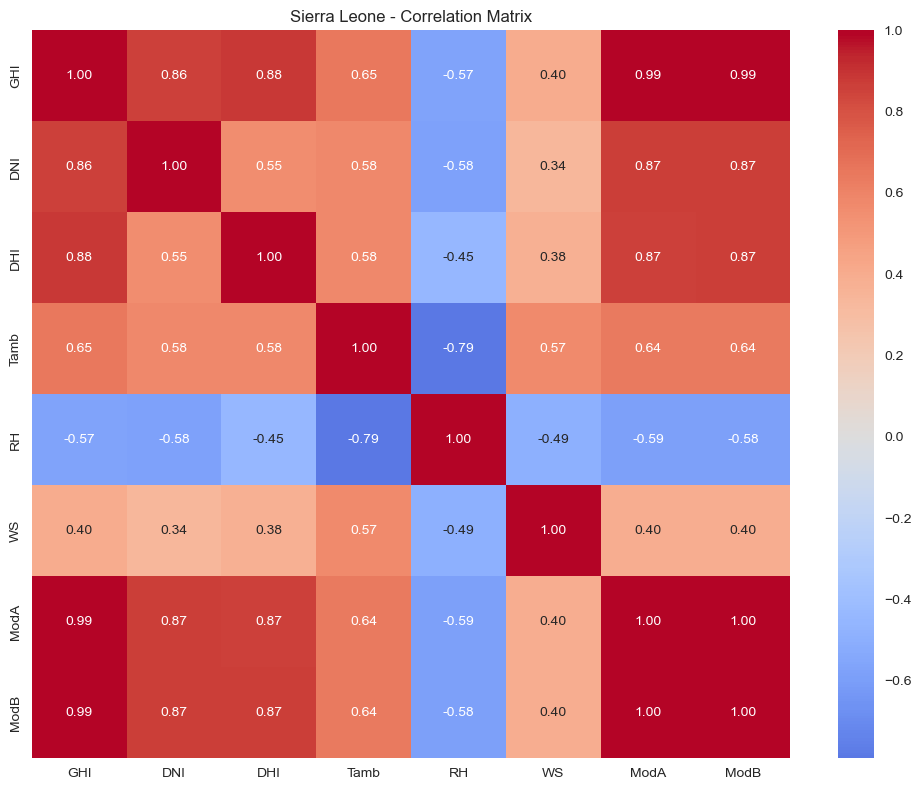

Top correlations with GHI:
GHI     1.000000
ModA    0.994898
ModB    0.994613
DHI     0.882559
DNI     0.861422
Tamb    0.649400
WS      0.403622
RH     -0.569956
Name: GHI, dtype: float64


In [13]:
# CORRELATION ANALYSIS
print("=== CORRELATION HEATMAP ===")
correlation_columns = ['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'ModA', 'ModB']
corr_matrix = df_clean[correlation_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Sierra Leone - Correlation Matrix')
plt.tight_layout()
plt.show()

# Top correlations with GHI
print("Top correlations with GHI:")
ghi_correlations = corr_matrix['GHI'].sort_values(ascending=False)
print(ghi_correlations)

=== DISTRIBUTION OF KEY VARIABLES ===


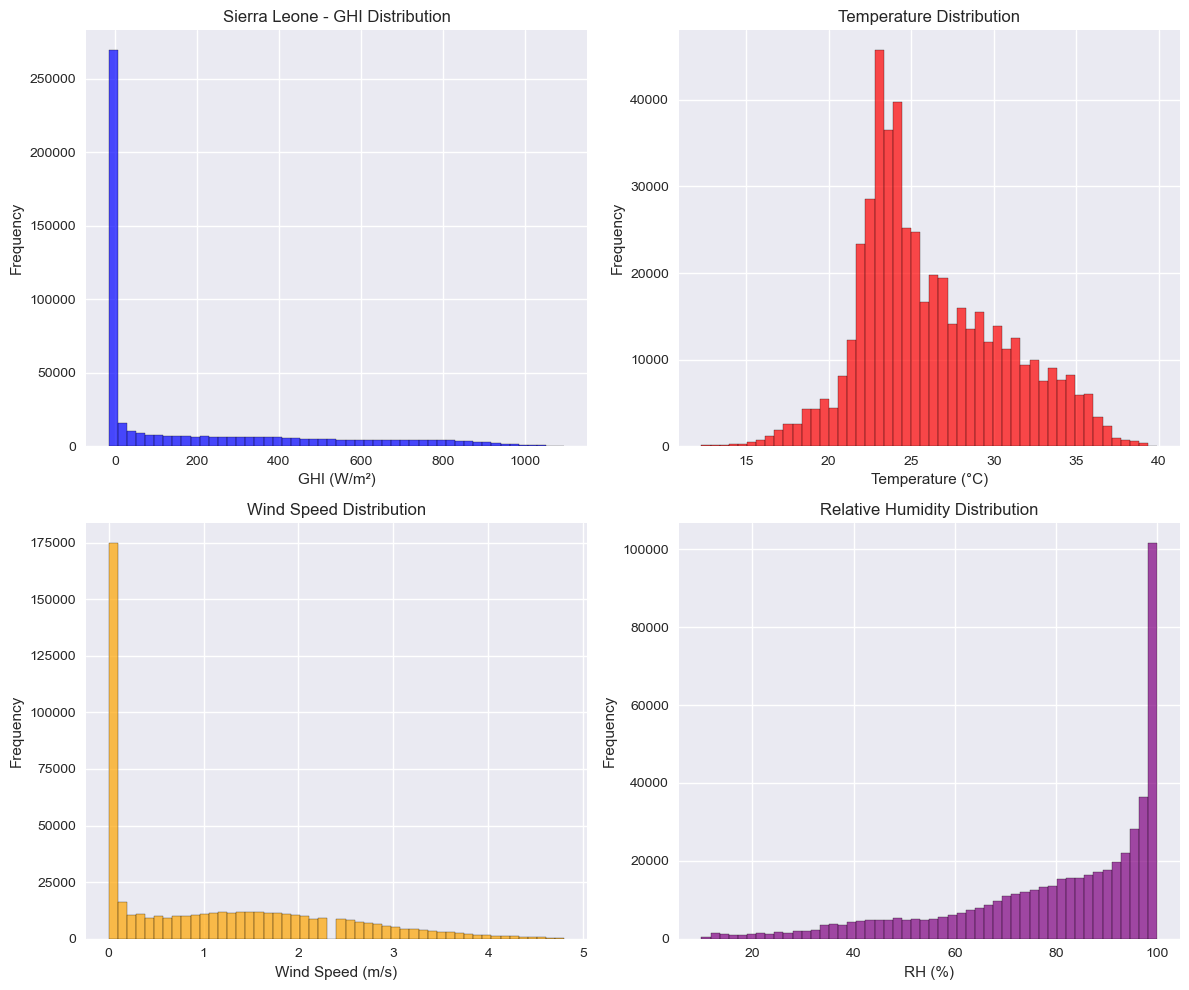

In [14]:
# DISTRIBUTION ANALYSIS
print("=== DISTRIBUTION OF KEY VARIABLES ===")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# GHI Distribution
axes[0,0].hist(df_clean['GHI'], bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[0,0].set_title('Sierra Leone - GHI Distribution')
axes[0,0].set_xlabel('GHI (W/m²)')
axes[0,0].set_ylabel('Frequency')

# Temperature Distribution
axes[0,1].hist(df_clean['Tamb'], bins=50, alpha=0.7, color='red', edgecolor='black')
axes[0,1].set_title('Temperature Distribution')
axes[0,1].set_xlabel('Temperature (°C)')
axes[0,1].set_ylabel('Frequency')

# Wind Speed Distribution
axes[1,0].hist(df_clean['WS'], bins=50, alpha=0.7, color='orange', edgecolor='black')
axes[1,0].set_title('Wind Speed Distribution')
axes[1,0].set_xlabel('Wind Speed (m/s)')
axes[1,0].set_ylabel('Frequency')

# RH Distribution
axes[1,1].hist(df_clean['RH'], bins=50, alpha=0.7, color='purple', edgecolor='black')
axes[1,1].set_title('Relative Humidity Distribution')
axes[1,1].set_xlabel('RH (%)')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [15]:
# EXPORT CLEANED DATA
print("=== EXPORTING CLEANED DATA ===")
df_clean.to_csv('../data/sierraleone_clean.csv', index=False)
print("✅ Cleaned dataset exported to '../data/sierraleone_clean.csv'")
print(f"Final clean dataset shape: {df_clean.shape}")

=== EXPORTING CLEANED DATA ===
✅ Cleaned dataset exported to '../data/sierraleone_clean.csv'
Final clean dataset shape: (509308, 22)


In [16]:
# SUMMARY INSIGHTS FOR SIERRA LEONE
print("=== SIERRA LEONE KEY FINDINGS ===")
print("\n🔬 DATA QUALITY:")
print(f"• Original data: {len(df):,} rows")
print(f"• Clean data: {len(df_clean):,} rows") 
print(f"• Data retention: {(len(df_clean)/len(df))*100:.1f}%")
print(f"• Outliers removed: {outlier_mask.sum():,} ({outlier_mask.sum()/len(df)*100:.1f}%)")

print("\n☀️ SOLAR POTENTIAL:")
print(f"• Max GHI: {df_clean['GHI'].max():.1f} W/m²")
print(f"• Average GHI: {df_clean['GHI'].mean():.1f} W/m²")
print(f"• Peak solar hour: {hourly_ghi.idxmax()}:00 ({hourly_ghi.max():.1f} W/m²)")

print("\n📊 KEY RELATIONSHIPS:")
print(f"• GHI-Temperature correlation: {corr_matrix.loc['GHI', 'Tamb']:.3f} (Strong)")
print(f"• GHI-RH correlation: {corr_matrix.loc['GHI', 'RH']:.3f} (Strong Negative)")
print(f"• GHI-Wind correlation: {corr_matrix.loc['GHI', 'WS']:.3f} (Moderate)")

print("\n🌡️ ENVIRONMENTAL CONDITIONS:")
print(f"• Temperature range: {df_clean['Tamb'].min():.1f}°C to {df_clean['Tamb'].max():.1f}°C")
print(f"• RH range: {df_clean['RH'].min():.1f}% to {df_clean['RH'].max():.1f}%")
print(f"• Wind speed range: {df_clean['WS'].min():.1f} to {df_clean['WS'].max():.1f} m/s")

print("\n🔍 COMPARISON WITH BENIN:")
print("• Sierra Leone has LOWER solar potential than Benin")
print("• Stronger humidity impact on solar radiation")
print("• Higher temperature correlation with GHI")

print("\n✅ SIERRA LEONE EDA COMPLETED!")

=== SIERRA LEONE KEY FINDINGS ===

🔬 DATA QUALITY:
• Original data: 525,600 rows
• Clean data: 509,308 rows
• Data retention: 96.9%
• Outliers removed: 16,292 (3.1%)

☀️ SOLAR POTENTIAL:
• Max GHI: 1097.0 W/m²
• Average GHI: 185.0 W/m²
• Peak solar hour: 12:00 (670.5 W/m²)

📊 KEY RELATIONSHIPS:
• GHI-Temperature correlation: 0.649 (Strong)
• GHI-RH correlation: -0.570 (Strong Negative)
• GHI-Wind correlation: 0.404 (Moderate)

🌡️ ENVIRONMENTAL CONDITIONS:
• Temperature range: 12.3°C to 39.9°C
• RH range: 9.9% to 100.0%
• Wind speed range: 0.0 to 4.8 m/s

🔍 COMPARISON WITH BENIN:
• Sierra Leone has LOWER solar potential than Benin
• Stronger humidity impact on solar radiation
• Higher temperature correlation with GHI

✅ SIERRA LEONE EDA COMPLETED!
